In [31]:
import pandas as pd
import numpy as np
import seaborn as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('train.csv')

In [33]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [35]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [38]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [39]:
X=df.drop('price_range', axis=1)
y=df['price_range']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=1)

In [41]:
X_train.shape, X_test.shape

((1600, 20), (400, 20))

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=6)

In [43]:
clf

DecisionTreeClassifier(max_depth=6)

In [44]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [45]:
y_pred=clf.predict(X_test)

In [46]:
y_pred

array([0, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 2, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 3, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 2, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2,
       0, 3, 2, 0, 3, 2, 1, 2, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 2, 3, 0, 1, 1, 3,
       3, 2, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1,
       0, 1, 2, 2, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       3, 1, 1, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 1, 2, 0, 0, 2, 2, 3, 0, 1, 1, 3, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 3, 1,

In [47]:
from sklearn.metrics import classification_report, accuracy_score

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        92
           1       0.76      0.81      0.78        96
           2       0.77      0.77      0.77       106
           3       0.90      0.87      0.88       106

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



In [49]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        88
           1       0.81      0.76      0.78       103
           2       0.77      0.77      0.77       107
           3       0.87      0.90      0.88       102

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.83      0.83      0.83       400



In [50]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


[Text(0.45794392523364486, 0.9285714285714286, 'x[13] <= 2235.5\ngini = 0.75\nsamples = 1600\nvalue = [408, 404, 394, 394]'),
 Text(0.18808411214953272, 0.7857142857142857, 'x[13] <= 1123.5\ngini = 0.584\nsamples = 849\nvalue = [408, 355, 86, 0]'),
 Text(0.09579439252336448, 0.6428571428571429, 'x[11] <= 1449.0\ngini = 0.209\nsamples = 380\nvalue = [335, 45, 0, 0]'),
 Text(0.06074766355140187, 0.5, 'x[13] <= 1052.5\ngini = 0.153\nsamples = 360\nvalue = [330, 30, 0, 0]'),
 Text(0.037383177570093455, 0.35714285714285715, 'x[0] <= 1861.0\ngini = 0.108\nsamples = 332\nvalue = [313, 19, 0, 0]'),
 Text(0.018691588785046728, 0.21428571428571427, 'x[6] <= 63.5\ngini = 0.052\nsamples = 297\nvalue = [289, 8, 0, 0]'),
 Text(0.009345794392523364, 0.07142857142857142, 'gini = 0.04\nsamples = 293\nvalue = [287, 6, 0, 0]'),
 Text(0.028037383177570093, 0.07142857142857142, 'gini = 0.5\nsamples = 4\nvalue = [2, 2, 0, 0]'),
 Text(0.056074766355140186, 0.21428571428571427, 'x[12] <= 1665.5\ngini = 0.431\

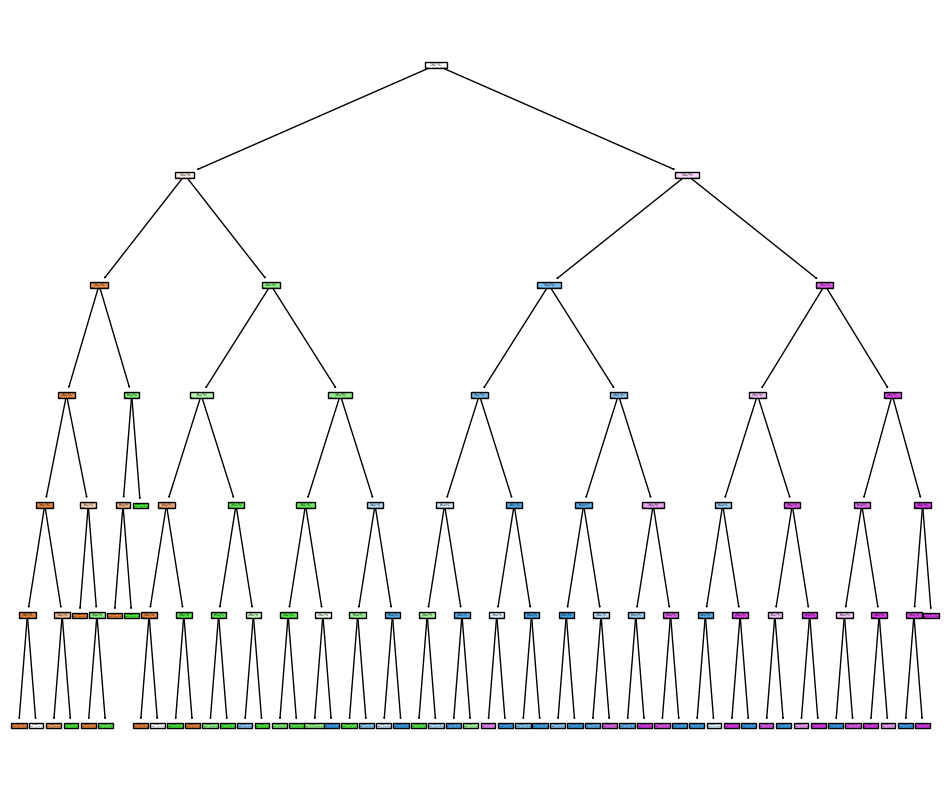

In [51]:
# visualize: 
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf, filled=True)

In [52]:
# prepruning: 
params={
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_depth': [1,2,3,4,5,6]
}

In [54]:
from sklearn.model_selection import GridSearchCV
clf=DecisionTreeClassifier()

In [59]:
model=GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', verbose=3)

In [60]:
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']},
             scoring='accuracy', verbose=3)

In [61]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=1, splitter=random;, score=0.434 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, splitter=random;, score=0.500 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, splitter=random;, score=0.500 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, splitter=random;, score=0.434 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, splitter=random;, score=0.466 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, splitter=best;, score=0.500 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, splitter=best;, score=0.503 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, splitter=best;, score=0.500 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, splitter=best;, score=0.500 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, splitter=best;, score=0.503 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']},
             scoring='accuracy', verbose=3)

In [62]:
model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

In [63]:
model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

In [64]:
model.best_score_

0.838125